# Using Decision Tree to classify gender based on age, height and weight

**Importing Libararies**

In [1]:
import pandas as pd
import matplotlib.pyplot as pyp
import seaborn as sb
import numpy as np

**Data Loading**

In [2]:
dataset = pd.read_csv('Gender_Classification_Data.csv')

**Exploratory Analysis of Data**

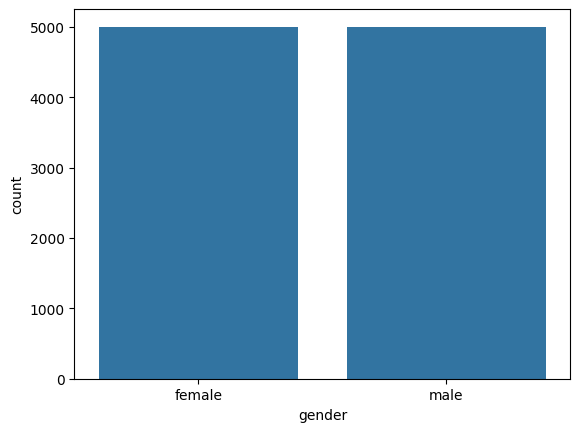

In [3]:
sb.countplot(x=dataset['gender'], data=dataset)
pyp.show()

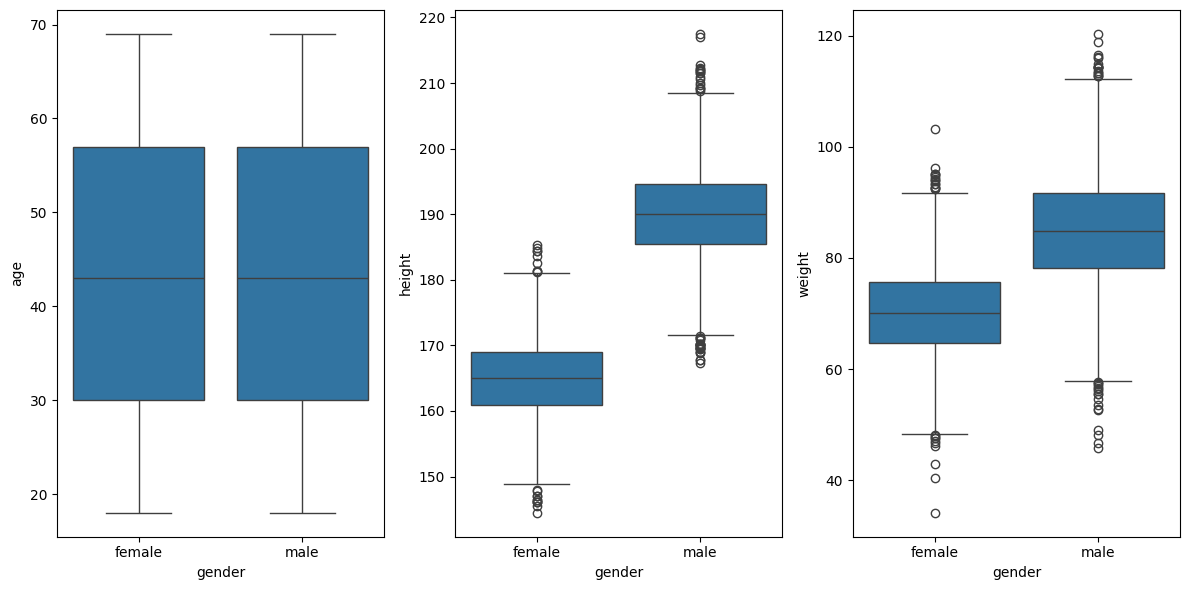

In [4]:
pyp.figure(figsize=(12, 6))
pyp.subplot(1, 3, 1)
sb.boxplot(x=dataset['gender'], y=dataset['age'], data=dataset)
pyp.subplot(1, 3, 2)
sb.boxplot(x=dataset['gender'], y=dataset['height'], data=dataset)
pyp.subplot(1, 3, 3)
sb.boxplot(x=dataset['gender'], y=dataset['weight'], data=dataset)
pyp.tight_layout()
pyp.show()

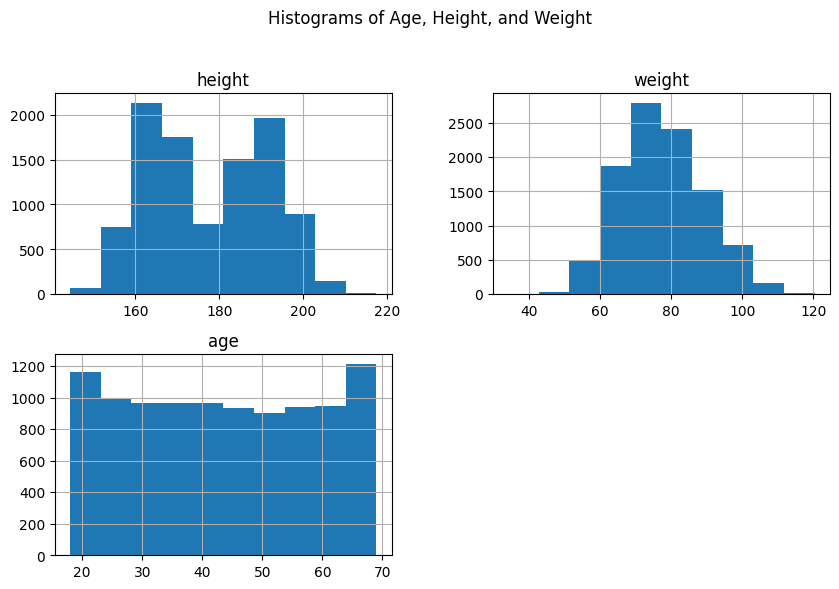

In [5]:
dataset[['height', 'weight', 'age']].hist(bins=10, figsize=(10, 6))
pyp.suptitle("Histograms of Age, Height, and Weight", y=1.02)
pyp.show()

**Extracting variables**

In [6]:
x = dataset[['height', 'weight', 'age']]
y = dataset['gender']

**Encoding when dealing with Strings (here it is optional)**

In [7]:
from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
#dataset['gender'] = encoder.fit_transform(dataset['gender'])

**Spliting data into training and testing set**

In [8]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 1/4, random_state=0)

**Fitting decision tree model to the training data**

In [9]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state = 0)
dtree.fit(train_x, train_y)

DecisionTreeClassifier(random_state=0)

**Predicting outcomes of testing set**

In [10]:
predicted_y = dtree.predict(test_x)
predicted_y

array(['male', 'female', 'female', ..., 'female', 'female', 'male'],
      dtype=object)

**Measuring Accuracy of model using classification report and confusion matrix**

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
classification_report(test_y, predicted_y)

'              precision    recall  f1-score   support\n\n      female       0.98      0.98      0.98      1216\n        male       0.98      0.98      0.98      1284\n\n    accuracy                           0.98      2500\n   macro avg       0.98      0.98      0.98      2500\nweighted avg       0.98      0.98      0.98      2500\n'

In [13]:
confusion_matrix(test_y, predicted_y)

array([[1186,   30],
       [  30, 1254]])

**Random Forest Model**

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 0)
rf.fit(train_x, train_y)

RandomForestClassifier(random_state=0)

**Outcome Prediction from Random Forest Model**

In [15]:
rf_predicted = rf.predict(test_x)
rf_predicted

array(['male', 'female', 'female', ..., 'female', 'female', 'male'],
      dtype=object)

**Measuring Accuracy**

In [16]:
confusion_matrix(test_y, rf_predicted)

array([[1201,   15],
       [  20, 1264]])